In [1]:
import pandas as pd

## 1. Load the Dataset

In [3]:
df_raw_data = pd.read_csv(r'C:\Users\KunalGu\Downloads\shampoo_sales_data.csv')

In [4]:
df_raw_data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
df_raw_data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [7]:
df_raw_data.describe(include=object)

,Month
count,36
unique,36
top,2-01
freq,1


## 2. Pre-Processing

In [28]:
df_preprocessed = df_raw_data.copy()

In [29]:
df_preprocessed['year'] = df_preprocessed.Month.apply(lambda x: int(x[0]))

In [30]:
df_preprocessed['month'] = df_preprocessed.Month.apply(lambda x: int(x[2:]))
df_preprocessed['year_month'] = df_preprocessed.Month.astype('category')
df_preprocessed.year_month = df_preprocessed.year_month.cat.codes

In [31]:
df_preprocessed.drop(columns=['Month'], inplace=True)

In [36]:
df_preprocessed.head(10)

,Sales,year,month,year_month
0,266.0,1,1,0
1,145.9,1,2,1
2,183.1,1,3,2
3,119.3,1,4,3
4,180.3,1,5,4
5,168.5,1,6,5
6,231.8,1,7,6
7,224.5,1,8,7
8,192.8,1,9,8
9,122.9,1,10,9


## 3. Regression Analysis

In [34]:
import seaborn as sns

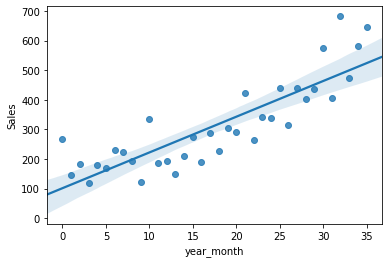

In [35]:
sns.regplot(x=df_preprocessed.year_month, y=df_preprocessed.Sales)

## 4. Create a Linear Regression Model

#### y = mx + b (m is the weight, b is the intercept)

In [46]:
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [47]:
X = df_preprocessed.year_month
y = df_preprocessed.Sales
lr_model_1 = LR()
lr_model_1.fit(X.values.reshape(-1, 1), y) # Model Creation (training the dataset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lr_model_1.predict(np.array([0, 10, 30, 40, 50]).reshape(-1, 1)) # Model Testing

array([101.21621622, 222.00694981, 463.58841699, 584.37915058,
       705.16988417])